<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#practical_plan">Practical plan</a></li>
        <li><a href="#reading_data">Imports and reading data </a></li>
        <li><a href="#kmeans">K-means clustering</a></li>
        <li><a href="#task1">Task 1: Visualising the clusters</a></li>
        <li><a href="#task2">Task 2: Different numbers of clusters </a></li>
        <li><a href="#task3">Task 3: Visualising clusters to show correspondance with the outcome</a></li>      
        <li><a href="#optimal">Finding the Optimal Number of Clusterg</a></li>
        <li><a href="#task4">Task 4: Generate a silhouette plot</a></li>
    </ol>
</div>
<br>
<hr>

<h2 id="practical_plan">Practical plan </h2>

- This practical aims to to implement KMeans to explore the bc_data dataset we created in the previous practical.  


<h2 id="reading_data">Imports and Reading data </h2>


- Remember, three vital packages will be used throughout: 
    - Pandas for data wrangling
    - Matplotlib for plotting
    - Sklean for machine learning




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

We also need to import KMeans from the sklearn package. This enables us to use the kmeans algorithm. 

In [2]:
from sklearn.cluster import KMeans

Now on to reading the data...
#### - Make sure you know the full path to bc_encoded.csv

The path below is my version. 


In [3]:
path_to_file ="/Users/babylon/Documents/Teaching/ML/ML2022/Day1/Practicals/bc_encoded.csv"
bc_data = pd.read_csv(path_to_file, encoding='utf-8')

- let's first look at our data again to have the features at hand: 

In [4]:
bc_data.head()

,Unnamed: 0,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,0,5,1,1,1,2,1.0,3,1,1,0
1,1,5,4,4,5,7,10.0,3,2,1,0
2,2,3,1,1,1,2,2.0,3,1,1,0
3,3,6,8,8,1,3,4.0,3,7,1,0
4,4,4,1,1,3,2,1.0,3,1,1,0


<h2 id="kmeans">K-means Clustering</h2>

- We will perform K-means clustering to see if the bc_data cohort contains meaningful subpopulations. 
- We will use all the features (apart from Class) for clustering. 

##### Note:
- In machine learning, it is customary to use the variable X to represent features and y to represent outcomes (for prediction)
- Need to extract the X and y dataframes from bc_data. We can use the .loc operator: 


In [5]:
X = bc_data.loc[:,['Clump_Thickness','Cell_Size_Uniformity','Cell_Shape_Uniformity','Marginal_Adhesion','Single_Epi_Cell_Size','Bland_Chromatin','Normal_Nucleoli','Mitoses']]
y = bc_data.loc[:, ['Class']]



Check the types and columns of X and y: 

In [6]:
print(type(X))
print(type(y))

X.columns
y.columns

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


Index(['Class'], dtype='object')

- Now: 
    - X is a dataframe containing all the features apart from the outcome
    - y is  a dataframe containing the outcome variable (Class)

#### Performing K-Means Clustering

- To start, let’s arbitrarily assign the value of k as 7. We will implement k-means clustering using k=7. For this we will instantiate the KMeans class of scikitlearn and assign it to the variable kmeans7:

- The fit_predict function will train the chosen algorithm (in our case, k-means, represented by the variable kmeans7) using the training data (in our case, x, which contains all the samples for the chosen features - in this case all features apart from the outcome).

In [7]:
kmeans7 = KMeans(n_clusters=7)
y_kmeans7 = kmeans7.fit_predict(X)

- We can now visualise the clusters. 
- Let's visualise how  the generated clusters appear in a scatter plot. 
- First, let's see if the individual features follow some patterns in the generated clusters. 
    - in the plot below, I am visualising the generated clusters across the first two features (Clump_Thickness and Cell_Size_Uniformity) 

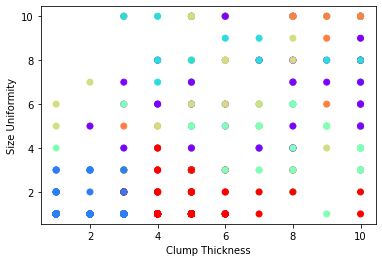

In [8]:
#the c argument reads 'colour', and we're are getting the clusters from our clustering objects 
#i.e., asking python to cluster objects that belong to the same cluster using the same colour 
# cmap dictatest the palette. we are using the rainbow palette. 

plt.scatter(X.Clump_Thickness,X.Cell_Size_Uniformity,c=y_kmeans7,cmap='rainbow')
plt.xlabel("Clump Thickness")
plt.ylabel("Size Uniformity")
plt.show()



<b>Note: </b>
    
If the above generates an error, incorporate the following in your code prior to calling the scatterplot function:

```python
    from importlib import reload
    plt=reload(plt)
```


<h2 id="task1">Task 1: Visualising the clusters </h2>

- You can try different combinations of features to plot, e.g. 
    - e.g. clump thickness and mitoses
    - cell size uniformity against cell shape uniformity
    - Normal Nucleoli against Cell Shape Uniformity
    - etc..


In [9]:
### Your solution ###


- You will have noticed that some features do better than others in adhereing to the clusters..
- A point to note here that we're only able to visualise two features at a time!
    - Future workshops/practicals will show you better methods for visualisation (possibly with all features together?)

<h2 id="task2">Task 2: Re-cluster using different numbers of clusters  </h2>

- Re-run K-keans using k=3 and plot the distribution of a couple of features as in before: 
    - What is happening to the clusters? how is the resolution of 'grouping' compared to when using k=7?


In [10]:
## Your solution here ##


<h2 id="task3">Task 3: Correspondance with the outcome </h2>

- Plotting the clusters against the outcome (y) can show us how well the individual cluster can distinguish between the classes. 

- For example, the plots below show how the cluster differentiates clump thickness in the two classes. 


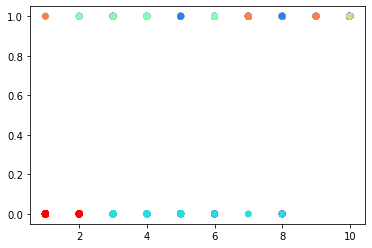

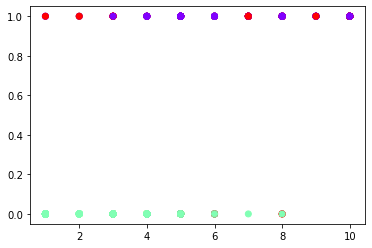

In [49]:
plt.scatter(X.Clump_Thickness,y, c=y_kmeans7,cmap='rainbow')
plt.show()

plt.scatter(X.Clump_Thickness,y, c=y_kmeans3,cmap='rainbow')
plt.show()


Your task: 
- Which ones is better? k = 3 or k = 7 in this case?
- Plot more features with respect to the outcome and formulate your judgement

In [11]:
### Your solution here ####




<h2 id="optimal">Finding the optimal number of clusters </h2>

- So far, we tried to different values for k (k = 3 and k = 7). But in practice, we need an efficient method for estimating the number of clusters. 
- Reminder: 
        - A cluster center is the representative of its cluster. The squared distance between each point and its cluster center is the required variation. The aim of k-means clustering is to find these k clusters and their centers while reducing the total error.
- In many applications, 'eyeballing' the plots generated to find any regularities is used to estimate the number of clusters. 
- However, mathematical/statistical methods also exist. We will now learn two commonly used methods and how to use those in python. These are: 
    - The Elbow Method
    - The Silhouette Method



#### The Elbow Method

- Possibly the most well-known (and likely most naive) method for determining the optimal number of clusters. It is based on the simple idea of running k-means clustering for a range of clusters k (let’s say from 1 to 10) and for each value, we are calculating the sum of squared distances from each point to its assigned center, also called the distortion. In detail: 

    - Calculate the Squared Error for each point as the square of the distance of the point from its representation i.e. its predicted cluster center (distortion).
    - The  Within-Cluster-Sum of Squared Errors (WSS) score, also called inertia, is the sum of these Squared Errors for all the points.

- Because it calcualtes WSS, the Elbow method is sometimes refered to as WSS.



#### Let's implement this in python:

In [51]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

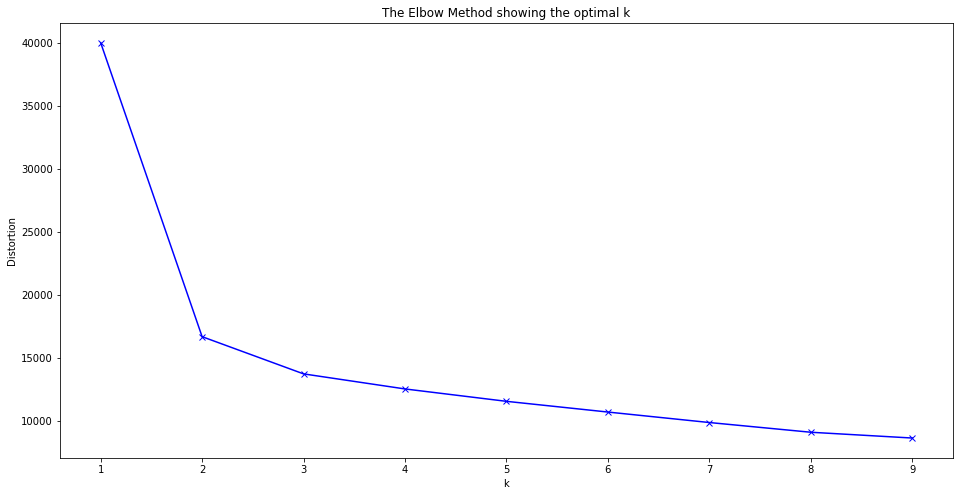

In [52]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We can observe that the “elbow” is formed at the number 3 which is optimal number of clusters for this case. This explains our previous observation that kmeans3 does a better job in distinguishin patients benign from malignant with respect to the clump thickness feature. 

#### Important Note: 
Although the Elbow method is very simple, unfortunately, we do not always have such clearly clustered data. This means that the elbow may not be clear and sharp. Examples are shown below (images from the web). In such cases, other methods must be used


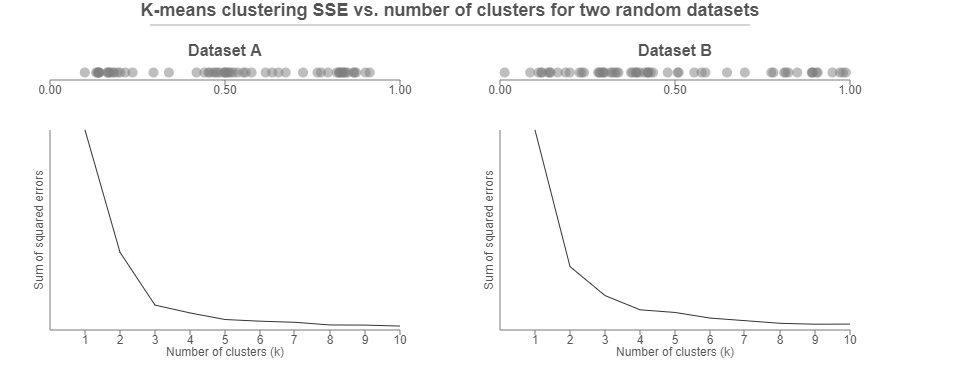

#### The Silhouette method

The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

The range of the Silhouette value is between +1 and -1. A high value is desirable and indicates that the point is placed in the correct cluster. If many points have a negative Silhouette value, it may indicate that we have created too many or too few clusters.
The Silhouette Value s(i) for each data point i is defined as follows:

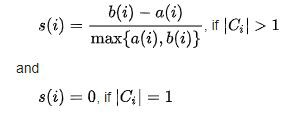

Source: Wikipedia

Note: s(i) is defined to be equal to zero if i is the only point in the cluster. This is to prevent the number of clusters from increasing significantly with many single-point clusters.

Here, a(i) is the measure of similarity of the point i to its own cluster. It is measured as the average distance of i from other points in the cluster.

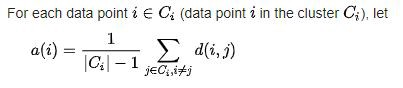

Similarly, b(i) is the measure of dissimilarity of i from points in other clusters.

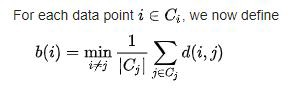

d(i, j) is the distance between points i and j. Generally, Euclidean Distance is used as the distance metric.


The Silhouette score can be easily calculated in Python using the metrics module of the <b>sklearn </b> library, which is your next task.


In [53]:
from sklearn.metrics import silhouette_score

##an array to store the silhouette scores for each number of clusters
sil = []

## the maximum number of clusters we would like to try
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

<h2 id="task4">Task 4: Plot the Silhouette Score and suggest the optimal number of clusters </h2>

Remember: a high Silhouette Score is desirable. The Silhouette Score reaches its global maximum at the optimal k. This should ideally appear as a peak in the Silhouette Value-versus-k plot.

- Plot each k (from 2 until kmax) against the generated silhouette score)
    - You can use the method range() to generate a list of numbers within a given range. See here for examples: https://pynative.com/python-range-function/

In [12]:
### Your solution here ###



- What did you see? do the two methods agree?